## Automatic detection of scale features and convert it to numbers and text

#### Modules import

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
import glob
import easyocr
import re
%matplotlib inline  # if you are running this code in Jupyter notebook

C:\Users\benjamin.martin\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\benjamin.martin\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\benjamin.martin\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)
UsageError: unrecognized arguments: # if you are running this code in Jupyter notebook


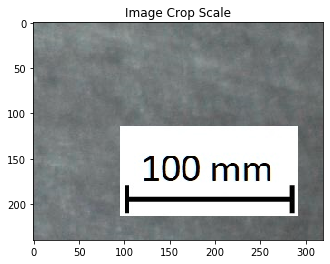

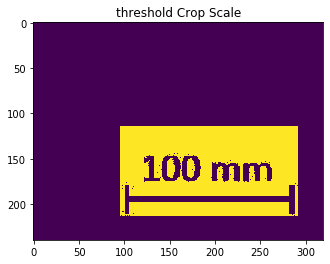

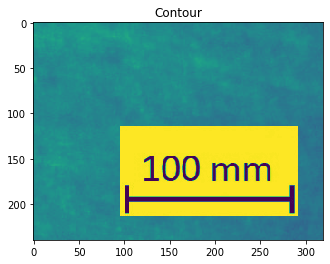

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Segment Length :  194


C:\Users\benjamin.martin\AppData\Local\Continuum\anaconda3\lib\site-packages\torchvision\models\_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
C:\Users\benjamin.martin\AppData\Local\Continuum\anaconda3\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
C:\Users\benjamin.martin\AppData\Local\Continuum\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior

Scale :  0.8


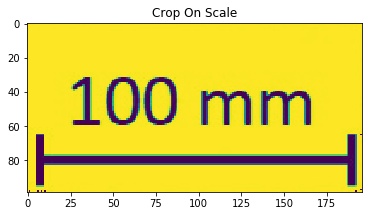

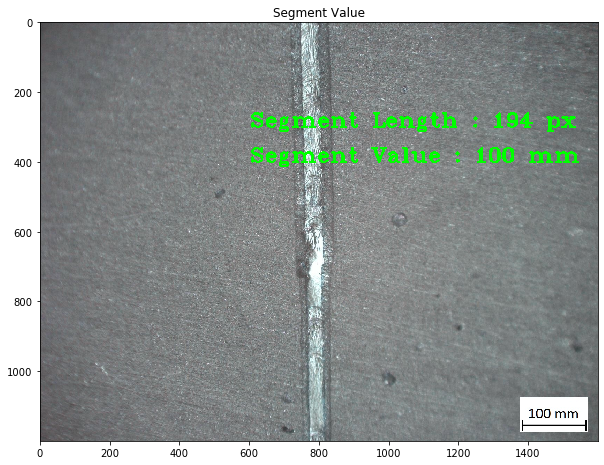

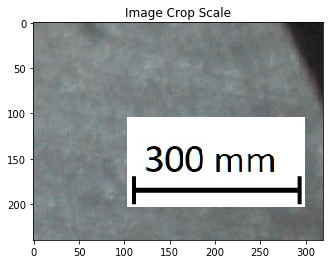

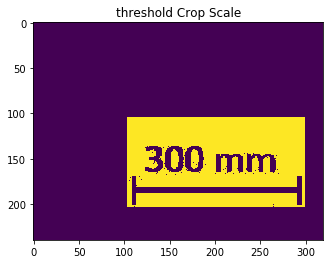

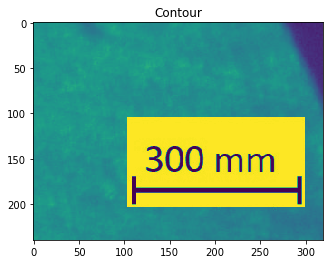

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Segment Length :  186
Scale :  0.8


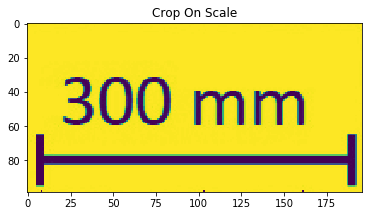

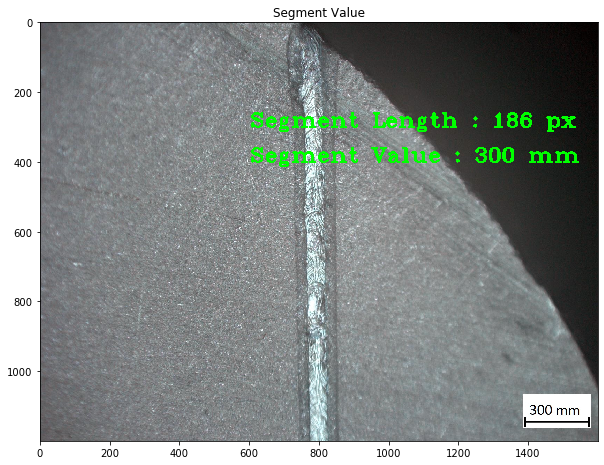

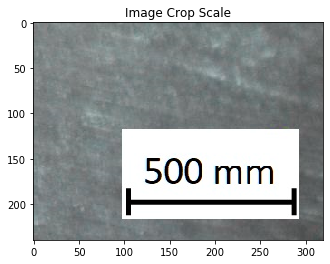

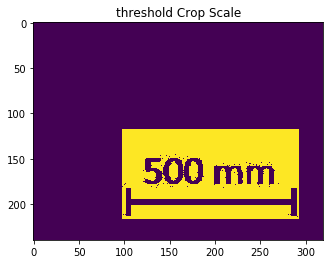

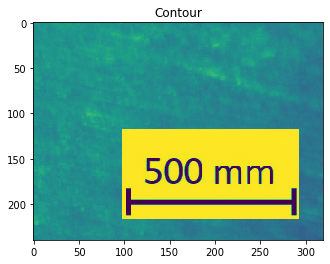

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Segment Length :  191
Scale :  0.8


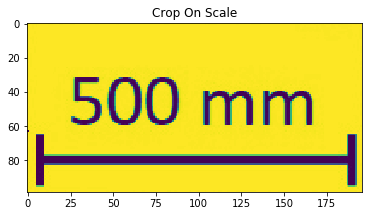

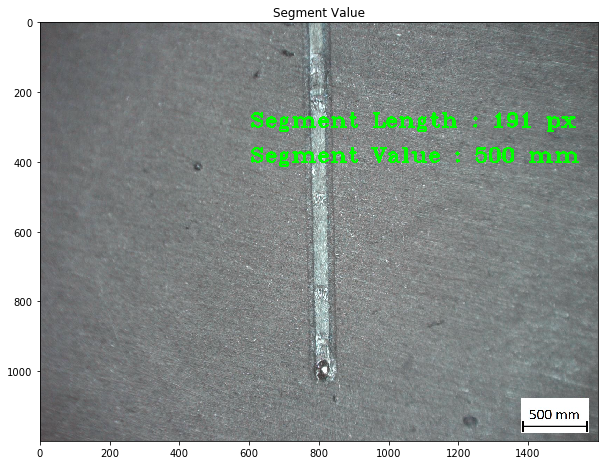

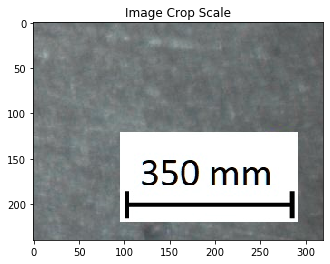

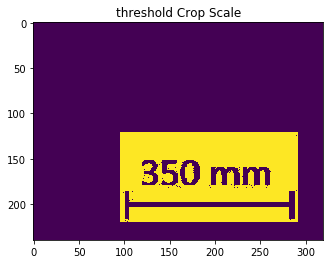

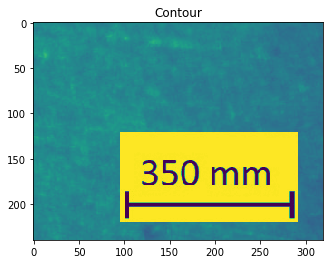

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Segment Length :  186
Scale :  0.8


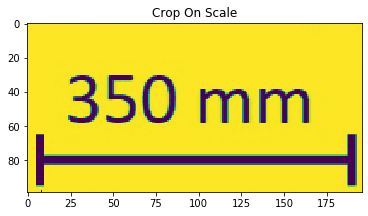

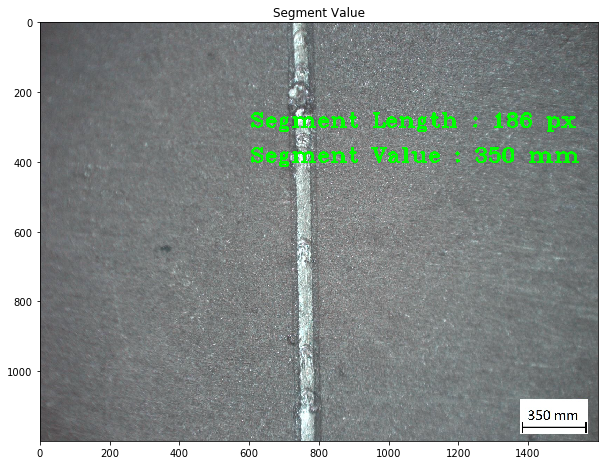

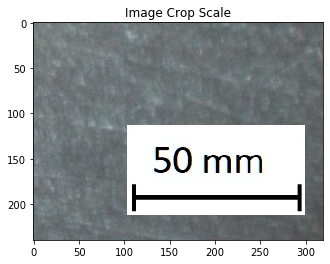

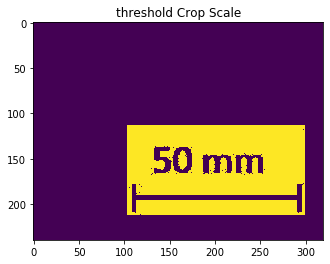

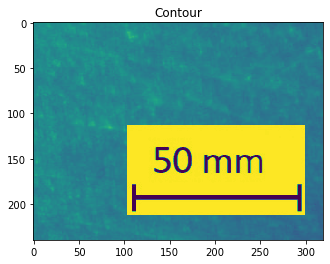

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Segment Length :  186
Scale :  0.8


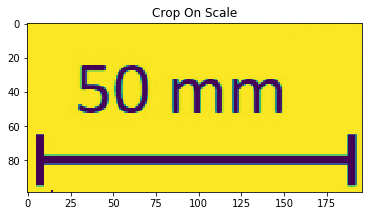

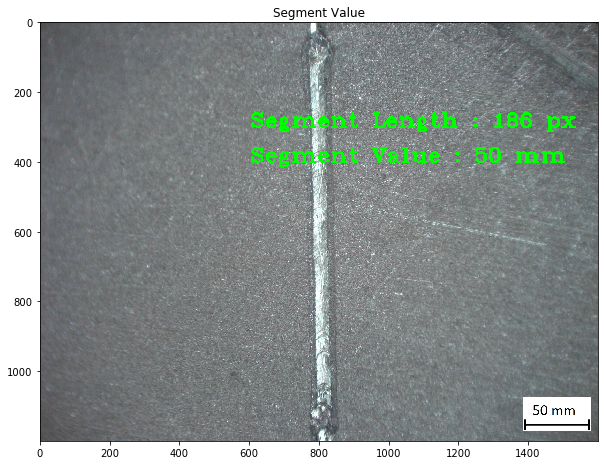

In [2]:
AllImages = glob.glob('./Pictures/*.jpg')

for i in range(len(AllImages)):
    Path = AllImages[i]
    image = cv2.imread(Path)

    #Location of the bottom right part
    Echelle = 0.8
    CropEchelle = image[np.round(image.shape[0]*Echelle,0).astype(int):,
                  np.round(image.shape[1]*Echelle,0).astype(int):,
                  :]
    plt.imshow(CropEchelle)
    plt.title('Image Crop Scale')
    plt.show()

    CropEchelleGray = cv2.cvtColor(CropEchelle, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(CropEchelleGray, 250, 255, cv2.THRESH_BINARY)
    plt.imshow(thresh)
    plt.title("threshold Crop Scale")
    plt.show()

    # find the largest contour in the threshold image
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    # draw the shape of the contour on the output image, compute the
    # bounding box, and display the number of points in the contour
    output = CropEchelleGray.copy()
    #cv2.drawContours(output, [c], -1, (0, 255, 0), 5)
    plt.imshow(output)
    plt.title('Contour')
    plt.show()

    #Crop on contour
    mask = np.zeros_like(output) # Create mask where white is what we want, black otherwise
    cv2.drawContours(mask, [c], -1, 255, -1) # Draw filled contour in mask
    out = np.zeros_like(output) # Extract out the object and place into output image
    out[mask == 255] = output[mask == 255]

    # Now crop
    (y, x) = np.where(mask == 255)
    (topy, topx) = (np.min(y), np.min(x))
    (bottomy, bottomx) = (np.max(y), np.max(x))
    out = out[topy:bottomy+1, topx:bottomx+1]

    # Show the output image
    plt.imshow(out)
    plt.title('Crop On Scale')

    #Segment Length
    black_pixels = np.array(np.where(out.T ==0))
    first_black_pixel = black_pixels[:,0]
    last_black_pixel = black_pixels[:,-1]
    LengthSegment = last_black_pixel[0]-first_black_pixel[0]
    print('Segment Length : ',LengthSegment)
    #Affichage
    #cv2.line(out, pt1=tuple(first_black_pixel), pt2=tuple(last_black_pixel), color=(0,255,255), thickness=5)
    #plt.imshow(out)

    #Scale value detection
    reader = easyocr.Reader(['en'])
    result = reader.readtext(out)
    ScaleNumber = int(re.findall('\d+', result[0][-2])[0])
    Metric = result[0][-2].split('{} '.format(ScaleNumber))[-1]
    print('Scale : ', Echelle)

    TextLargeurSegment = 'Segment Length : {} px '.format(LengthSegment)
    TextValeurEchelle = 'Segment Value : {} {}'.format(ScaleNumber,Metric)
    cv2.putText(image, TextLargeurSegment, (600, 300), cv2.FONT_HERSHEY_COMPLEX_SMALL,3, (0,255,0), 6)
    cv2.putText(image, TextValeurEchelle, (600, 400), cv2.FONT_HERSHEY_COMPLEX_SMALL,3, (0,255,0), 6)
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.title('Segment Value')
    plt.show()